<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="5" color="black"><b>Recognition of hand-written digits with IBM Watson Machine Learning</b></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr>
   <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/hand-written-digits-recognition/images/numbers_banner-04.png" width="600" alt="Icon"> </th>
   </tr>
</table>

This notebook contains steps and code to get data from the IBM Data Science Experience Community, create a predictive model, and start scoring new data. This notebook introduces commands for getting data and for basic data cleaning and exploration, pipeline creation, model training, model persistance to Watson Machine Learning repository, model deployment, and scoring.

Some familiarity with Python is helpful. This notebook uses Python 3.5 and scikit-learn 0.17 package.

You will use a toy dataset available in scikit-learn, **sklearn.datasets.load_digits**, which contains hand-written digits images. Use the toy dataset to recognize hand-written digits.

## Learning goals

The learning goals of this notebook are:

-  Load a toy dataset from scikit-learn.
-  Explore data.
-  Prepare data for training and evaluation.
-  Create Scikit-learn machine learning pipeline.
-  Train and evaluate a model.
-  Persist a pipeline and model in Watson Machine Learning repository.
-  Deploy a model for online scoring using Wastson Machine Learning API.
-  Score sample scoring data using the Watson Machine Learning API.
-  Explore and visualize prediction result using matplotlib package.


## Contents

This notebook contains the following parts:

1.	[Setup](#setup)
2.	[Load and explore data](#load)
3.	[Create scikit-learn model](#model)
4.	[Persist model](#persistence)
5.	[Predict locally and visualize](#visualization)
6.	[Deploy and score in a Cloud](#scoring)
7.	[Summary and next steps](#summary)

<a id="setup"></a>
## 1. Setup

Before you use the sample code in this notebook, you must perform the following setup task:

-  Create a [Watson Machine Learning Service](https://console.ng.bluemix.net/catalog/services/ibm-watson-machine-learning/) instance (a free plan is offered). 

<a id="load"></a>
## 2. Load and explore data

In this section you will load the data from scikit-learn toy datasets and perform a basic exploration.

**Example**: First, you need to install required packages. You can do it by running the following code. Run it only one time.<BR><BR>
!pip install sklearn --user <BR>

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

Loaded toy dataset consists of 8x8 pixels images of hand-written digits. In next step you will plot first 5 images using **matplotlib** library.

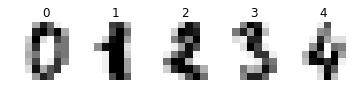

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

images_number = 5
images_and_labels = list(zip(digits.images, digits.target))

for i, (image, label) in enumerate(images_and_labels[:images_number]):
    plt.subplot(2, images_number, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

Let's display first digit data and label using **data** and **target**.

In [3]:
print(digits.data[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [4]:
digits.target[0]

0

In next step you will count all samples.

In [5]:
samples_count = len(digits.images)
print("Number of samples: " + str(samples_count))

Number of samples: 1797


<a id="model"></a>
## 3. Create a Scikit-learn machine learning model

In this section you will learn how to prepare data, create a Scikit-learn machine learning pipeline, and train a model.

### 3.1: Prepare data

In this subsection you will split your data into: train, test datasets.

In [6]:
train_data = digits.data[: int(0.7*samples_count)]
train_labels = digits.target[: int(0.7*samples_count)]

test_data = digits.data[int(0.7*samples_count): int(0.9*samples_count)]
test_labels = digits.target[int(0.7*samples_count): int(0.9*samples_count)]

score_data = digits.data[int(0.9*samples_count): ]


print("Number of training records: " + str(len(train_data)))
print("Number of testing records : " + str(len(test_data)))
print("Number of scoring records : " + str(len(score_data)))


Number of training records: 1257
Number of testing records : 360
Number of scoring records : 180


As you can see our data has been successfully split into two datasets: 

-  The train data set, which is the largest group, is used for training.
-  The test data set will be used for model evaluation and is used to test the assumptions of the model.
-  The score data set will be used for scoring in Cloud.

### 3.2: Create pipeline and train a model

In this section you will create scikit-learn machine learning pipeline and then train the model.

In the first step you need to import the scikit-learn machine learning packages that will be needed in the subsequent steps.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import svm, metrics

Standardize features by removing the mean and scaling to unit variance.

In [8]:
scaler = preprocessing.StandardScaler()

Next, define estimators you want to use for classification. Support Vector Machines with radial basis function as kernel is used in the following example.

In [9]:
clf = svm.SVC(kernel='rbf')

Let's build the pipeline now. A pipeline consists of transformers and an estimator.

In [10]:
pipeline = Pipeline([('scaler', scaler), ('svc', clf)])

Now, you can train your Random Forest model by using the previously defined **pipeline** and **train data**.

In [11]:
model = pipeline.fit(train_data, train_labels)

You can check your **model quality** now. To evaluate the model, use **test data**.

In [12]:
predicted = model.predict(test_data)

print("Evaluation report: \n\n%s" % metrics.classification_report(test_labels, predicted))

Evaluation report: 

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.97      0.97      0.97        34
          2       1.00      0.97      0.99        36
          3       1.00      0.94      0.97        35
          4       0.78      0.97      0.87        37
          5       0.97      0.97      0.97        38
          6       0.97      0.86      0.91        36
          7       0.92      0.97      0.94        35
          8       0.91      0.89      0.90        35
          9       0.97      0.92      0.94        37

avg / total       0.95      0.94      0.95       360



You can tune your model now to achieve better accuracy. For simplicity of this example tuning section is omitted.

<a id="persistence"></a>
## 4. Persist model

In this section you will learn how to store your pipeline and model in Watson Machine Learning repository by using python client libraries.

First, you must import client libraries.

In [13]:
from repository.mlrepositoryclient import MLRepositoryClient
from repository.mlrepositoryartifact import MLRepositoryArtifact
from repository.mlrepository import MetaProps, MetaNames

Authenticate to Watson Machine Learning service on Bluemix.

**Action**: Put authentication information from your instance of Watson Machine Learning service here.</div>

In [14]:
service_path = 'https://ibm-watson-ml.mybluemix.net'
username = '***'
password = '***'
instance_id = '***'

**Tip**: service_path, user and password can be found on **Service Credentials** tab of service instance created in Bluemix.

In [15]:
ml_repository_client = MLRepositoryClient(service_path)
ml_repository_client.authorize(username, password)

Create model artifact (abstraction layer).

In [16]:
props = MetaProps({MetaNames.AUTHOR_NAME:"IBM", MetaNames.AUTHOR_EMAIL:"ibm@ibm.com"})

In [17]:
model_artifact = MLRepositoryArtifact(model, name="Hand-written digits recognition", meta_props=props)

**Tip**: The MLRepositoryArtifact method expects a trained model object, training data, and a model name. (It is this model name that is displayed by the Watson Machine Learning service).

### 4.1: Save pipeline and model

In this subsection you will learn how to save pipeline and model artifacts to your Watson Machine Learning instance.

In [18]:
saved_model = ml_repository_client.models.save(model_artifact)

Get saved model metadata from Watson Machine Learning.

**Tip**: Use *meta.available_props()* to get the list of available props.

In [19]:
saved_model.meta.available_props()

dict_keys(['lastUpdated', 'version', 'authorEmail', 'trainingDataRef', 'runtime', 'pipelineVersionHref', 'modelVersionHref', 'creationTime', 'modelType', 'authorName'])

In [20]:
print("modelType: " + saved_model.meta.prop("modelType"))
print("runtime: " + saved_model.meta.prop("runtime"))
print("creationTime: " + str(saved_model.meta.prop("creationTime")))
print("modelVersionHref: " + saved_model.meta.prop("modelVersionHref"))

modelType: scikit-model-0.17.1
runtime: python-3.5
creationTime: 2017-07-21 10:10:08.496000+00:00
modelVersionHref: https://ibm-watson-ml.mybluemix.net/v2/artifacts/models/2761f6e3-b15e-45a5-ac16-9ca64495e876/versions/0c920445-96fb-45b1-bcf7-df9d7a3209f7


**Tip**: **modelVersionHref** is our model unique indentifier in the Watson Machine Learning repository.

### 4.2: Load model

In this subsection you will learn how to load back saved model from specified instance of Watson Machine Learning.

In [21]:
loadedModelArtifact = ml_repository_client.models.get(saved_model.uid)

You can print for example model name to make sure that model has been loaded correctly.

In [22]:
print(loadedModelArtifact.name)
print(saved_model.uid)

Hand-written digits recognition
2761f6e3-b15e-45a5-ac16-9ca64495e876


As you can see the name is correct. You have already learned how save and load the model from Watson Machine Learning repository.

<a id="visualization"></a>
## 5. Predict locally and visualize

In this section you will learn how to score test data using loaded model and visualize the prediction results with plotly package.

### 5.1: Make local prediction using previously loaded model and score data

In this subsection you will score *predict_data* data set.

In [23]:
predictions = loadedModelArtifact.model_instance().predict(score_data)

Print prediction results.

In [24]:
print(predictions)

[5 2 8 0 1 7 6 3 2 1 7 8 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7
 2 2 5 4 3 5 8 4 5 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 5
 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 8 8
 7 5 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4
 5 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


### 5.2: Sample visualization of data with matplotlib package

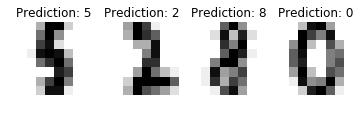

In [25]:
images_and_predictions = list(zip(digits.images[int(0.9*samples_count): ], predictions))
for i, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, i + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

<a id="scoring"></a>
## 6. Deploy and score in a Cloud

In this section you will learn how to create online scoring and to score a new data record by using the Watson Machine Learning REST API. 
For more information about REST APIs, see the [Swagger Documentation](http://watson-ml-api.mybluemix.net/).

To work with the Watson Machine Leraning REST API you must generate an access token. To do that you can use the following sample code:

In [26]:
import urllib3, requests, json

headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(username, password))
url = '{}/v3/identity/token'.format(service_path)
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

### 6.1: Create model deployment

Get published_models url from instance details.

#### Get instance details

In [27]:
endpoint_instance = service_path + "/v3/wml_instances/" + instance_id
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken} 

response_get_instance = requests.get(endpoint_instance, headers=header)
print(response_get_instance)
print(response_get_instance.text)

<Response [200]>
{"metadata":{"guid":"81eb122f-a170-4efd-86b6-4a8afa16d30b","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b","created_at":"2017-07-17T11:30:15.027Z","modified_at":"2017-07-21T10:10:08.574Z"},"entity":{"source":"Bluemix","published_models":{"url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models"},"usage":{"expiration_date":"2017-08-01T00:00:00.000Z","computation_time":{"current":0},"model_count":{"current":2},"prediction_count":{"current":0},"deployment_count":{"current":0}},"plan_id":"0f2a3c2c-456b-40f3-9b19-726d2740b11c","account_id":"500838470","status":"Active","organization_guid":"5a46f2ad-87af-451a-a6ea-684c0bb92ce9","region":"us-south","deployments":{"url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/deployments"},"space_guid":"e6d9f948-d4d4-411b-9ce4-3fbaf243aed6","plan":"standard"}}


In [28]:
endpoint_published_models = json.loads(response_get_instance.text).get('entity').get('published_models').get('url')

print(endpoint_published_models)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models


Execute the following sample code that uses the published_models endpoint to get deployments url.

#### Get the list of published models

In [29]:
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}
response_get = requests.get(endpoint_published_models, headers=header)

print(response_get)
print(response_get.text)

<Response [200]>
{"count":1,"resources":[{"metadata":{"guid":"2761f6e3-b15e-45a5-ac16-9ca64495e876","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models/2761f6e3-b15e-45a5-ac16-9ca64495e876","created_at":"2017-07-21T10:10:08.496Z","modified_at":"2017-07-21T10:10:08.572Z"},"entity":{"runtime_environment":"python-3.5","author":{"name":"IBM","email":"ibm@ibm.com"},"name":"Hand-written digits recognition","latest_version":{"url":"https://ibm-watson-ml.mybluemix.net/v2/artifacts/models/2761f6e3-b15e-45a5-ac16-9ca64495e876/versions/0c920445-96fb-45b1-bcf7-df9d7a3209f7","guid":"0c920445-96fb-45b1-bcf7-df9d7a3209f7","created_at":"2017-07-21T10:10:08.572Z"},"model_type":"scikit-model-0.17.1","deployments":{"count":0,"url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models/2761f6e3-b15e-45a5-ac16-9ca64495e876/deployments"}}}]}


#### Get published model deployment url

In [30]:
[endpoint_deployments] = [x.get('entity').get('deployments').get('url') for x in json.loads(response_get.text).get('resources') if x.get('metadata').get('guid') == saved_model.uid]

print(endpoint_deployments)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models/2761f6e3-b15e-45a5-ac16-9ca64495e876/deployments


#### Create online deployment for published model

In [32]:
payload_online = {"name": "Hand written digits recognition", "description": "Hand Written Digits Deployment", "type": "online"}
response_online = requests.post(endpoint_deployments, json=payload_online, headers=header)

print(response_online)
print(response_online.text)

<Response [201]>
{"metadata":{"guid":"0de6709d-ee04-4b49-804c-e3fd7573f6db","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models/2761f6e3-b15e-45a5-ac16-9ca64495e876/deployments/0de6709d-ee04-4b49-804c-e3fd7573f6db","created_at":"2017-07-21T10:10:58.965Z","modified_at":"2017-07-21T10:11:00.030Z"},"entity":{"runtime_environment":"python-3.5","name":"Hand written digits recognition","scoring_url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models/2761f6e3-b15e-45a5-ac16-9ca64495e876/deployments/0de6709d-ee04-4b49-804c-e3fd7573f6db/online","description":"Hand Written Digits Deployment","published_model":{"author":{"name":"IBM","email":"ibm@ibm.com"},"name":"Hand-written digits recognition","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models/2761f6e3-b15e-45a5-ac16-9ca64495e876","guid":"2761f6e3-b15e-45a5-ac16-9c

In [33]:
scoring_url = json.loads(response_online.text).get('entity').get('scoring_url')

print(scoring_url)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/81eb122f-a170-4efd-86b6-4a8afa16d30b/published_models/2761f6e3-b15e-45a5-ac16-9ca64495e876/deployments/0de6709d-ee04-4b49-804c-e3fd7573f6db/online


 Now, you can send (POST) new scoring records (new data) for which you would like to get predictions. To do that, execute the following sample code: 

In [34]:
digit = list(digits.data[1])
digit2 = list(digits.data[2])

In [35]:
payload_scoring = {"values": [digit, digit2]}
print(payload_scoring)

{'values': [[0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 9.0, 0.0, 0.0, 0.0, 0.0, 3.0, 15.0, 16.0, 6.0, 0.0, 0.0, 0.0, 7.0, 15.0, 16.0, 16.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 16.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 16.0, 10.0, 0.0, 0.0], [0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0, 0.0, 3.0, 16.0, 15.0, 14.0, 0.0, 0.0, 0.0, 0.0, 8.0, 13.0, 8.0, 16.0, 0.0, 0.0, 0.0, 0.0, 1.0, 6.0, 15.0, 11.0, 0.0, 0.0, 0.0, 1.0, 8.0, 13.0, 15.0, 1.0, 0.0, 0.0, 0.0, 9.0, 16.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 13.0, 16.0, 16.0, 11.0, 5.0, 0.0, 0.0, 0.0, 0.0, 3.0, 11.0, 16.0, 9.0, 0.0]]}


In [37]:
response_scoring = requests.post(scoring_url, json=payload_scoring, headers=header)

print(response_scoring.text)

{
  "values": [[1], [2]],
  "fields": ["prediction"]
}


As we can see we predict that hand-written digits are: 1 and 2.

<a id="summary"></a>
## 7. Summary and next steps     

 You successfully completed this notebook! You learned how to use scikit-learn machine learning as well as Watson Machine Learning for model creation and deployment. Check out our _[Online Documentation](https://console.ng.bluemix.net/docs/services/PredictiveModeling/index.html?pos=2)_ for more samples, tutorials, documentation, how-tos, and blog posts. 

### Authors

**Lukasz Cmielowski**, PhD, is a Automation Architect and Data Scientist in IBM with a track record of developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.

Copyright © 2017 IBM. This notebook and its source code are released under the terms of the MIT License.